In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("House_Data.csv")

# Display basic dataset information
print(df.info())  # Check data types and missing values
print(df.head())  # Preview the first few rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13320 non-null  object 
 1   availability   13320 non-null  object 
 2   size           13304 non-null  object 
 3   society        7818 non-null   object 
 4   total_sqft     13320 non-null  object 
 5   bath           13247 non-null  float64
 6   balcony        12711 non-null  float64
 7   price          13320 non-null  float64
 8   site_location  13319 non-null  object 
dtypes: float64(3), object(6)
memory usage: 936.7+ KB
None
              area_type   availability       size  society total_sqft  bath  \
0  Super built-up  Area         19-Dec      2 BHK  Coomee        1056   2.0   
1            Plot  Area  Ready To Move  4 Bedroom  Theanmp       2600   5.0   
2        Built-up  Area  Ready To Move      3 BHK      NaN       1440   2.0   
3  Super built-up  Area  Ready To

In [2]:
# Check for missing values in the dataset
print("Missing values count per column:")
print(df.isnull().sum())

Missing values count per column:
area_type           0
availability        0
size               16
society          5502
total_sqft          0
bath               73
balcony           609
price               0
site_location       1
dtype: int64


In [10]:
# Fill missing values for all columns
df.fillna({
    'bath': df['bath'].median(),
    'balcony': df['balcony'].median(),
    'society': 'Unknown',
    'area_type': df['area_type'].mode()[0],
    'size': df['size'].mode()[0],  # Fill missing 'size' with most frequent value
    'site_location': 'Unknown'  # Fill missing 'site_location' with 'Unknown'
}, inplace=True)

# Verify missing values are handled
print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
area_type        0
availability     0
size             0
society          0
total_sqft       0
bath             0
balcony          0
price            0
site_location    0
price_log        0
dtype: int64


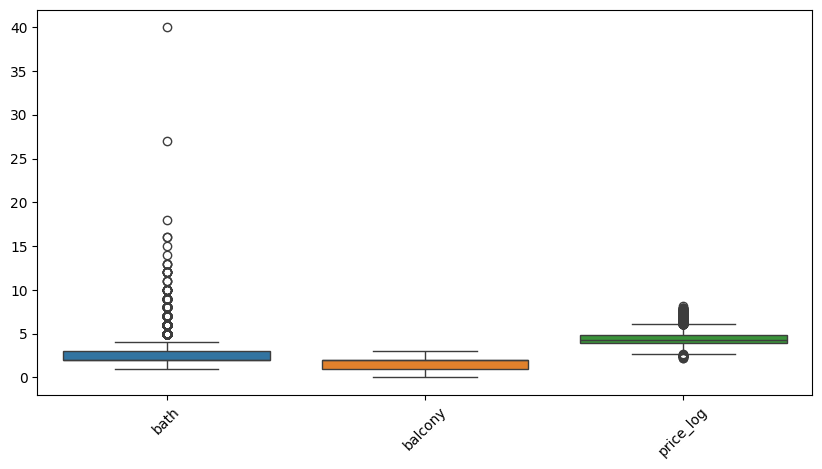

In [11]:
# Apply log transformation to 'price' to reduce scale difference
df['price_log'] = np.log1p(df['price'])  # log1p avoids log(0) issues

# Redraw the boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['bath', 'balcony', 'price_log']])
plt.xticks(rotation=45)
plt.show()

In [12]:
# Compute the Interquartile Range (IQR)
Q1 = df[['bath', 'balcony', 'price']].quantile(0.25)
Q3 = df[['bath', 'balcony', 'price']].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (df[['bath', 'balcony', 'price']] < lower_bound) | (df[['bath', 'balcony', 'price']] > upper_bound)

# Display number of outliers per column
print("Number of outliers detected:")
print(outliers.sum())

Number of outliers detected:
bath       1039
balcony       0
price      1276
dtype: int64


In [15]:
# Remove outliers from the dataset
df_cleaned = df[~outliers.any(axis=1)]

# Display the number of rows before and after cleaning
print("Rows before cleaning:", df.shape[0])
print("Rows after cleaning:", df_cleaned.shape[0])

Rows before cleaning: 13320
Rows after cleaning: 11474


In [16]:
# Save the cleaned dataset to a new CSV file
df_cleaned.to_csv("House_Data_Cleaned.csv", index=False)

print("Cleaned dataset saved as 'House_Data_Cleaned.csv'")

Cleaned dataset saved as 'House_Data_Cleaned.csv'
